<a href="https://colab.research.google.com/github/NabilBADRI/Multidialect-Project/blob/main/NLP_fasttext_Aravec_CNN_Embedding_TUNISIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUNisian Dataset

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train=pd.read_excel('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/dataset1and2.xlsx')
# test=pd.read_excel('/content/drive/MyDrive/kaggle-nabil-badri/Text Classification Notebooks/BI-GRU/MyArticle-dataset-arabe/dataset1and2.xlsx')
label=pd.read_excel('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/dataset1and2.xlsx',header=None).iloc[:,-1]
#OFF=0 
#NOT=1

In [ ]:
train['word_count'] = train['commentaire'].apply(lambda x : len(x.split()))
train

,Unnamed: 0,commentaire,classe,word_count
0,0,اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله ن...,hate,11
1,1,قطع يد السارق توفرت الشروط شرط الحد الأدنى قيم...,normal,14
2,2,تلوموش لطفي لعبدلي شرف,normal,4
3,3,مستغرب شعب يسمع تفاهة شانو لى الدرجة الشعب تاف...,normal,20
4,4,هههخ غزلتني مافهمتش شمدخلها الموضوع تتنطر وحده...,normal,9
...,...,...,...,...
6455,431,وجهو وجه الطحين ورخس,abusive,4
6456,432,الله لا يبارك فيكم و في الي تزرعوا فيه اليوم ل...,hate,20
6457,433,ملا حثالة مستدعيه ، قواد ولحاس ، طيح مستوى الب...,hate,15
6458,434,شبعة خمج.اينما يقيم الجهل,hate,4


In [ ]:
# #Encoding
# df.label.replace({'normal':0,'abusive':1,'spam':2,'hateful':3},inplace=True)
# df.head()

In [ ]:
train[train['word_count'] == 30]

,Unnamed: 0,commentaire,classe,word_count
865,865,شهر قالت تونس مافيها رجال طلعت وباقي دافعوا رد...,normal,30
1182,1182,قابسي باين لهجتو قريت قابس وفما ناس شبعانة للت...,normal,30
1370,1370,طفح الكيل يريدون فرض العلمنة الغربية بلاد المس...,hate,30
1654,1654,رعاية الاطفال ختصاص الطرفين النص بالنص مصاريف ...,normal,30
1898,1898,جماعة شمس متربي شكلكم موبنة كيفو تنجم ميبون وم...,abusive,30
1921,1921,يعملو الديانة نتاعو بطاقة التعريف الهوية حالة ...,normal,30
1952,1952,دحمي القرعاني توانسة امازيغ اصحاب الارض السود ...,hate,30
2028,2028,أخرس مسلم عالم مرتزقة حثالة الأمم نياك صرم أمك...,hate,30
2413,2413,نفهم نبدل التلفزة الوليدات الصغار عائلة يفهمو ...,normal,30
2683,2683,مايا نابغة عصرها وانا افكارها وتوجهاتها تحية ل...,normal,30


In [ ]:
train['commentaire'][335]

'غناية مخرجها'

In [ ]:
y_train=train['classe']
X_train=train['commentaire']
#test=test['comm']
y_train=pd.factorize(y_train)[0]
# y_test=pd.factorize(y_test)[0]
train['labels'] = pd.factorize(y_train)[0]

import collections
collections.Counter(y_train)

#Counter({0: 4400, 1: 8840})

Counter({0: 1399, 1: 3857, 2: 1204})

In [ ]:
train

,Unnamed: 0,commentaire,classe,word_count,labels
0,0,اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله ن...,hate,11,0
1,1,قطع يد السارق توفرت الشروط شرط الحد الأدنى قيم...,normal,14,1
2,2,تلوموش لطفي لعبدلي شرف,normal,4,1
3,3,مستغرب شعب يسمع تفاهة شانو لى الدرجة الشعب تاف...,normal,20,1
4,4,هههخ غزلتني مافهمتش شمدخلها الموضوع تتنطر وحده...,normal,9,1
...,...,...,...,...,...
6455,431,وجهو وجه الطحين ورخس,abusive,4,2
6456,432,الله لا يبارك فيكم و في الي تزرعوا فيه اليوم ل...,hate,20,0
6457,433,ملا حثالة مستدعيه ، قواد ولحاس ، طيح مستوى الب...,hate,15,0
6458,434,شبعة خمج.اينما يقيم الجهل,hate,4,0


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#cleaning data
import re
from nltk.stem.porter import PorterStemmer
tokenizer=nltk.tokenize.WhitespaceTokenizer()
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")

def preprocess(review):
   review = re.sub('[^ا-ي]', ' ', review)
 
   review = tokenizer.tokenize(review)
   review = [ar_stemmer.stemWord(word) for word in review if not word in set(stopwords_list )]
   review = ' '.join(review)
   return review

In [ ]:
# X_train = train['commentaire'].apply(preprocess)
X_train = X_train.apply(preprocess)


In [ ]:
X_train[0] ### Après preprocessing

'اسغ ياشعب تونس تدع اسلام كفار حمدلله نعم اسلام بلد جزاير'

In [ ]:
train['commentaire'][0] ### Originale

'اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله نعمة الاسلام بلدنا الجزاير'

In [ ]:
# x=train[323].lower().replace('@user','').replace('url','')
# x=re.sub('[^A-Za-z]', ' ', x)
# re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x)

In [ ]:
# # Creating the training corpus
# stop_words = set(stopwords.words("english")) 
# lemmatizer = WordNetLemmatizer()
# corpus_train = []
# for i in train:
#     x=i.lower()
#     x=x.replace('@user','')
#     x=x.replace('@[\w\-]+','')
#     #x=x.translate(str.maketrans('', '', string.punctuation))
#     x = re.sub('[^A-Za-z]', ' ', x)
#     #x=re.sub('\s+',' ',x)
#     x=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x) #url
#     #x = [lemmatizer.lemmatize(token) for token in x.split(" ")]
#     #x = [word for word in x if not word in stop_words]
#     #x=" ".join(x)
#     corpus_train.append(x)    
# # Creating the training corpus
# corpus_test = []
# for i in test:
#     x=i.lower()
#     x=x.replace('@user','')
#     x=x.replace('@[\w\-]+','')
#     #x=x.translate(str.maketrans('', '', string.punctuation))
#     x = re.sub('[^A-Za-z]', ' ', x)
#     #x=re.sub('\s+',' ',x)
#     x=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x) #url
#     #x = [lemmatizer.lemmatize(token) for token in x.split(" ")]
#     #x = [word for word in x if not word in stop_words]
#     #x=" ".join(x)
#     corpus_test.append(x) 

In [ ]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import sequence
# max_words = 5000 #frequency of words to be kept
# max_len = 200
# tokenize = Tokenizer(num_words=max_words)
# tokenize.fit_on_texts(corpus_train)
# sequences = tokenize.texts_to_sequences(corpus_train)
# word_index = tokenize.word_index
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
# splitting the data into target and feature
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train ,test_size = 0.1, random_state=0)
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1 
vocab_size # Adding 1 because of reserved 0 index

14667

In [ ]:
word_index = tokenizer.word_index


In [ ]:
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)
print('Max len:', maxlen)

Max len: 388


In [ ]:
# len(x.split())

# lens_train = [len(i.split()) for i in list(train['commentaire'])]
# lens_test = [len(i.split()) for i in X_test]
# lens = lens_train + lens_test

# maxlen_ = np.max(train['word_count'])
# print('Max len:', maxlen_)


In [ ]:
# num_words = min(max_words, len(word_index)) + 1
# print(num_words)

In [ ]:
### AraVec embeddings
# !wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_300_twitter.zip

In [ ]:
### Unzip AraVec 
# !unzip /content/full_grams_cbow_300_twitter.zip

In [ ]:
# !mv /content/full_grams_cbow_300_twitter.mdl.trainables.syn1neg.npy /content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl.trainables.syn1neg.npy
# !mv /content/full_grams_cbow_300_twitter.mdl.wv.vectors.npy /content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl.wv.vectors.npy

In [ ]:
### FastText Arabic embeddings
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz

In [ ]:
### Unzip FastText Arabic
# !gzip -d /content/cc.ar.300.vec.gz

In [ ]:
embedding_path1 = "/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/cc.ar.300.vec" ### FadText Arabic
embedding_path2 = "/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl.wv.vectors.npy" ### AraVec
#embedding_path2 = "/content/full_grams_cbow_300_twitter.mdl.wv.vectors.npy" ### AraVec

embed_size = 300

In [ ]:
def get_coefs(word,*arr):
    return word, np.asarray(arr, dtype='float32')

def build_matrix(embedding_path, word_index):
    embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

    nb_words = min(maxlen, len(word_index))
    # embedding_matrix = np.zeros((nb_words + 1, embed_size))
    embedding_matrix = np.zeros((vocab_size + 1, embed_size))
    for word, i in word_index.items():
        if i >= maxlen:
            continue
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix


In [ ]:
fasttext_arabic_emb = build_matrix(embedding_path1, word_index)
# aravec_emb = build_matrix(embedding_path2, word_index)

In [ ]:
fasttext_arabic_emb.shape

(14668, 300)

In [ ]:
import gensim

t_model = gensim.models.Word2Vec.load('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl')

In [ ]:
# word_vector = t_model.wv[ token ]

def build_aravec_matrix(embedding_path, word_index):

    nb_words = min(maxlen, len(word_index))
    # embedding_matrix = np.zeros((nb_words + 1, embed_size))
    embedding_matrix = np.zeros((vocab_size + 1, embed_size))
    for word, i in word_index.items():
        if i >= maxlen:
            continue
        try:
          embedding_vector = t_model.wv[word]
        except KeyError:
          continue
        if embedding_vector is not None:
            embedding_matrix[i] = t_model.wv[word]
    return embedding_matrix

In [ ]:
aravec_emb = build_aravec_matrix(embedding_path2, word_index)

In [ ]:
aravec_emb.shape

(14668, 300)

In [ ]:
aravec_emb

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52427763, -0.17721991, -0.67358071, ..., -1.02551579,
        -1.43612766,  0.11169961],
       [ 0.16235431, -1.00791025, -0.86719418, ..., -0.01928542,
        -1.11376536, -1.04606497],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

ccombinaison des deux embedding


In [ ]:
embedding_matrix2=np.mean((fasttext_arabic_emb, aravec_emb),axis=0)
embedding_matrix2.shape

(14668, 300)

In [ ]:
from keras.preprocessing import sequence

# test_sequences = tokenize.texts_to_sequences(corpus_test)
X_train_pad = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test_pad  = sequence.pad_sequences(X_test, maxlen=maxlen)

In [ ]:
from keras import backend as K
def f1(y_true, y_pred):
    
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
callbacks = keras.callbacks.EarlyStopping(monitor='val_f1', mode='max', verbose=1,
                                          patience=8,restore_best_weights = True)

In [ ]:
from keras.models import Sequential,Model
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from keras.layers import Embedding,Dense,GRU, Conv1D
from keras.layers import Dropout,Bidirectional,GlobalMaxPool1D,GlobalAveragePooling1D
from keras.layers import SpatialDropout1D,concatenate,Input
# from keras.optimizers import RMSprop
from keras.initializers import Constant
from sklearn.utils import class_weight
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights=dict(enumerate(class_weights))

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

# CNN Model

### Training a model with aravec and Fasttext embedding

In [ ]:
inp=Input((maxlen,))
#Embedding Layer 
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(embedding_matrix2),
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
#GRU Bidrirectionnel (si vous voulez activer CNN, mettez en commentaire cette ligne)
#x=Bidirectional(GRU(150, return_sequences = True))(x)

### Couche CNN 
x=Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu')(x) 

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])

 
x=Dropout(0.2)(conc)
out=Dense(16, activation="relu")(x)
out=Dense(8, activation="relu")(out)

out=Dense(3, activation="softmax")(out)

model=Model(inp,out)

mcp_save = ModelCheckpoint('model.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)



In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 388)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 388, 300)     4400400     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 388, 300)    0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 conv1d (Conv1D)                (None, 386, 32)      28832       ['spatial_dropout1d[0][0]']  

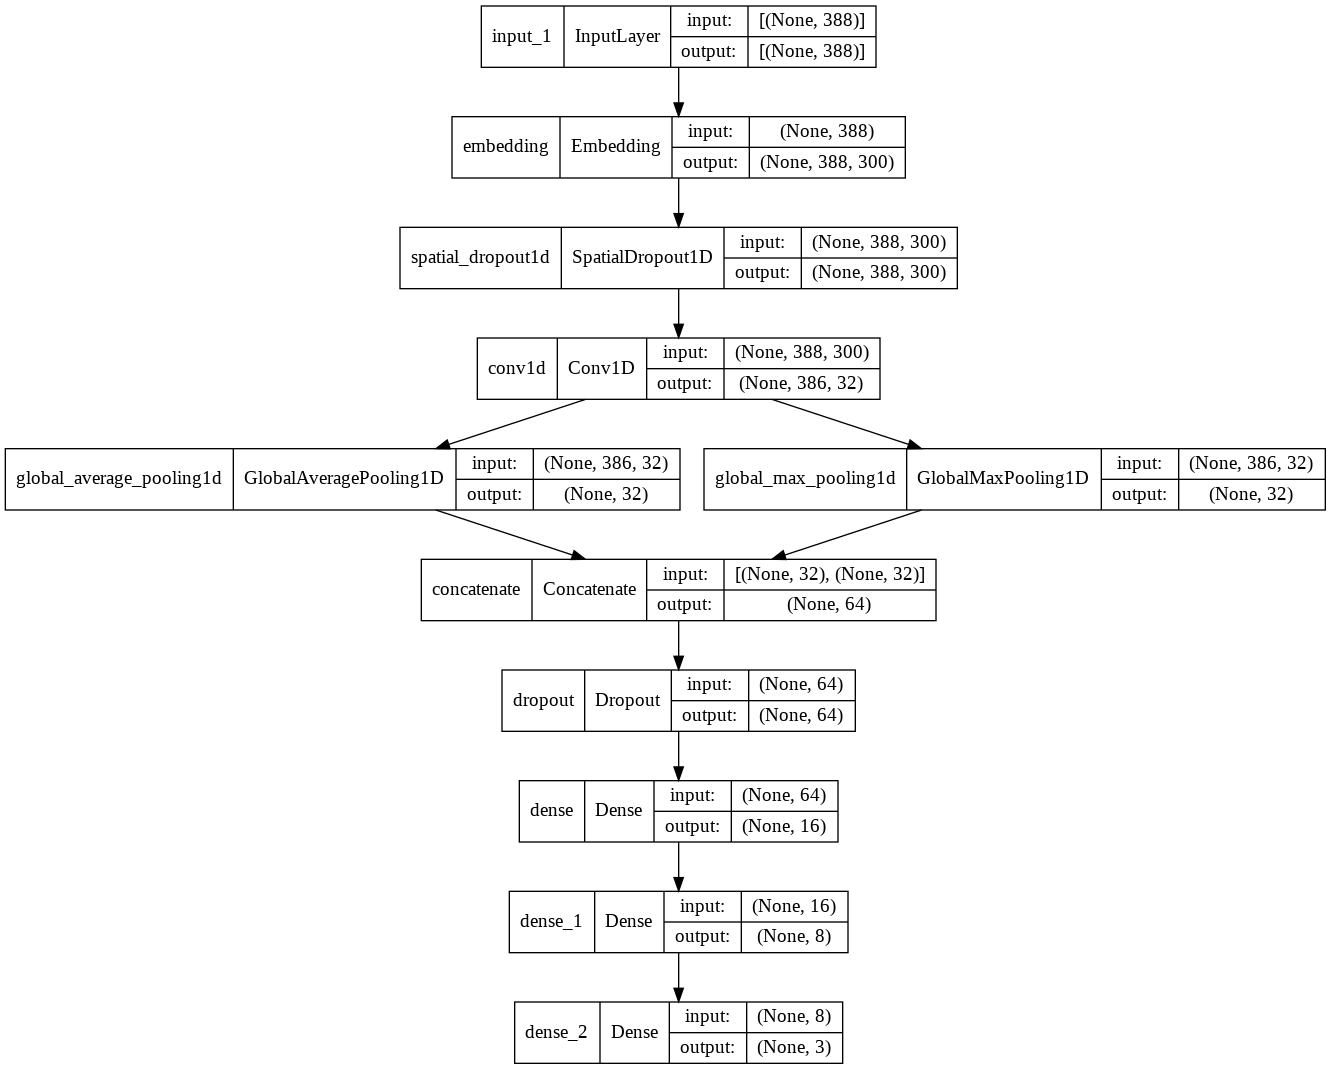

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.fit(X_train_pad, y_train, batch_size=128, epochs=30, verbose=1, class_weight=class_weights,
          validation_split = 0.2, callbacks=[callbacks])

Epoch 1/30
37/37 [==============================] - 15s 47ms/step - loss: 1.1034 - f1: 0.0296 - val_loss: 1.0687 - val_f1: 0.0031
Epoch 2/30
37/37 [==============================] - 1s 34ms/step - loss: 1.0312 - f1: 0.0860 - val_loss: 1.0435 - val_f1: 0.1470
Epoch 3/30
37/37 [==============================] - 1s 31ms/step - loss: 0.9597 - f1: 0.2461 - val_loss: 0.9154 - val_f1: 0.3821
Epoch 4/30
37/37 [==============================] - 1s 31ms/step - loss: 0.8655 - f1: 0.4638 - val_loss: 0.9704 - val_f1: 0.4004
Epoch 5/30
37/37 [==============================] - 1s 33ms/step - loss: 0.7774 - f1: 0.5710 - val_loss: 0.8316 - val_f1: 0.5685
Epoch 6/30
37/37 [==============================] - 1s 31ms/step - loss: 0.6868 - f1: 0.6586 - val_loss: 0.8314 - val_f1: 0.5773
Epoch 7/30
37/37 [==============================] - 1s 31ms/step - loss: 0.5768 - f1: 0.7847 - val_loss: 0.7620 - val_f1: 0.6731
Epoch 8/30
37/37 [==============================] - 1s 30ms/step - loss: 0.4757 - f1: 0.8394 - v

In [ ]:
print(model.evaluate(X_test_pad, y_test))

21/21 [==============================] - 0s 6ms/step - loss: 0.9186 - f1: 0.7352
[0.918645977973938, 0.7352007031440735]


In [ ]:
y_pred = model.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred, target_names=(['Hate','Normal','Abusive'])))


6/6 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

        Hate       0.59      0.54      0.57       155
      Normal       0.81      0.83      0.82       371
     Abusive       0.68      0.62      0.65       120

   micro avg       0.74      0.72      0.73       646
   macro avg       0.69      0.66      0.68       646
weighted avg       0.74      0.72      0.73       646
 samples avg       0.72      0.72      0.72       646



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_score(y_test, y_pred, average="weighted")

0.7283719663256715

In [ ]:
from tensorflow import keras
keras.backend.clear_session()

In [ ]:
from sklearn import metrics
metric = metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average='weighted'), metrics.recall_score(y_test, y_pred, average='weighted'), metrics.precision_score(y_test, y_pred, average='weighted')

(0.0, 1.0)

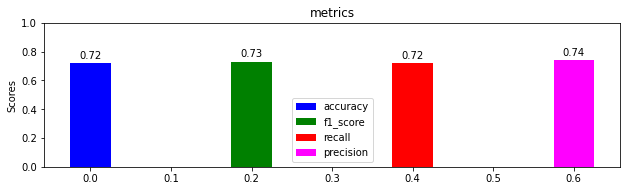

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')
def autolabel(rects):
  """Attach a text label above each bar in *rects*, displaying its height."""
  for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Training on Fasttext Embedding Only

In [ ]:
keras.backend.clear_session()

In [ ]:
inp=Input(shape=(maxlen, ))
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(fasttext_arabic_emb),#Set Fasttext Embedding
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
# x=Bidirectional(GRU(150, return_sequences = True))(x)
x=Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu')(x) 
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])


x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(x)

out=Dense(3, activation="softmax")(x)

model_ft=Model(inp,out)

mcp_save = ModelCheckpoint('model_fasttext.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)


In [ ]:
model_ft.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model_ft.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 388)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 388, 300)     4400400     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 388, 300)    0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 conv1d (Conv1D)                (None, 386, 32)      28832       ['spatial_dropout1d[0][0]']  

In [ ]:
model_ft.fit(X_train_pad, 
             y_train, 
             batch_size=128,
             epochs=20,
             verbose=1,
             class_weight=class_weights,
             validation_split=0.2,
             callbacks=[callbacks])

Epoch 1/20
37/37 [==============================] - 2s 43ms/step - loss: 1.0482 - f1: 0.0331 - val_loss: 0.9921 - val_f1: 0.1201
Epoch 2/20
37/37 [==============================] - 1s 32ms/step - loss: 0.8944 - f1: 0.2990 - val_loss: 0.8794 - val_f1: 0.4249
Epoch 3/20
37/37 [==============================] - 1s 31ms/step - loss: 0.7142 - f1: 0.6284 - val_loss: 0.8074 - val_f1: 0.5784
Epoch 4/20
37/37 [==============================] - 1s 31ms/step - loss: 0.5126 - f1: 0.8339 - val_loss: 0.7474 - val_f1: 0.6453
Epoch 5/20
37/37 [==============================] - 1s 34ms/step - loss: 0.3497 - f1: 0.9055 - val_loss: 0.6950 - val_f1: 0.6925
Epoch 6/20
37/37 [==============================] - 1s 33ms/step - loss: 0.2271 - f1: 0.9473 - val_loss: 0.6773 - val_f1: 0.7138
Epoch 7/20
37/37 [==============================] - 1s 31ms/step - loss: 0.1469 - f1: 0.9698 - val_loss: 0.7063 - val_f1: 0.6968
Epoch 8/20
37/37 [==============================] - 1s 31ms/step - loss: 0.1042 - f1: 0.9768 - va

In [ ]:
print(model_ft.evaluate(X_test_pad, y_test))

21/21 [==============================] - 0s 6ms/step - loss: 0.8139 - f1: 0.7324
[0.8139183521270752, 0.7324271202087402]


In [ ]:
y_pred_ft = model_ft.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool_ft = np.argmax(y_pred, axis=1)
y_pred_ft = (y_pred_ft > 0.5)

print(classification_report(y_test, y_pred_ft, target_names=(['Hate','Normal','Abusive'])))


6/6 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

        Hate       0.59      0.55      0.57       155
      Normal       0.83      0.81      0.82       371
     Abusive       0.64      0.57      0.60       120

   micro avg       0.74      0.71      0.72       646
   macro avg       0.68      0.65      0.66       646
weighted avg       0.73      0.71      0.72       646
 samples avg       0.71      0.71      0.71       646



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
metric_ft = metrics.accuracy_score(y_test, y_pred_ft), metrics.f1_score(y_test, y_pred_ft, average='weighted'), metrics.recall_score(y_test, y_pred_ft, average='weighted'), metrics.precision_score(y_test, y_pred_ft, average='weighted')

(0.0, 1.0)

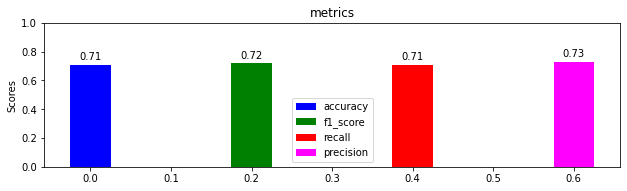

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric_ft[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric_ft[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric_ft[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric_ft[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')


autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Training on Aravec Embedding Only

In [ ]:
keras.backend.clear_session()

In [ ]:
inp=Input(shape=(maxlen, ))
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(aravec_emb),#Set Fasttext Embedding
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
# x=Bidirectional(GRU(150, return_sequences = True))(x)
x=Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu')(x) 
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])


x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(x)

out=Dense(3, activation="softmax")(x)

model_arav=Model(inp,out)

mcp_save = ModelCheckpoint('model_aravec.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)


In [ ]:
model_arav.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model_arav.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 388)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 388, 300)     4400400     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 388, 300)    0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 conv1d (Conv1D)                (None, 386, 32)      28832       ['spatial_dropout1d[0][0]']  

In [ ]:
model_arav.fit(X_train_pad, 
             y_train, 
             batch_size=128,
             epochs=20,
             verbose=1,
             class_weight=class_weights,
             validation_split=0.2,
             callbacks=[callbacks])

Epoch 1/20
37/37 [==============================] - 2s 42ms/step - loss: 1.1594 - f1: 0.3511 - val_loss: 0.9754 - val_f1: 0.4113
Epoch 2/20
37/37 [==============================] - 1s 32ms/step - loss: 0.9353 - f1: 0.4663 - val_loss: 0.9270 - val_f1: 0.4903
Epoch 3/20
37/37 [==============================] - 1s 32ms/step - loss: 0.8412 - f1: 0.5425 - val_loss: 0.8664 - val_f1: 0.5439
Epoch 4/20
37/37 [==============================] - 1s 31ms/step - loss: 0.7667 - f1: 0.6005 - val_loss: 0.8261 - val_f1: 0.5919
Epoch 5/20
37/37 [==============================] - 1s 31ms/step - loss: 0.7162 - f1: 0.6504 - val_loss: 0.8617 - val_f1: 0.5774
Epoch 6/20
37/37 [==============================] - 1s 31ms/step - loss: 0.6531 - f1: 0.6880 - val_loss: 0.8228 - val_f1: 0.6104
Epoch 7/20
37/37 [==============================] - 1s 30ms/step - loss: 0.5957 - f1: 0.7358 - val_loss: 0.8269 - val_f1: 0.6058
Epoch 8/20
37/37 [==============================] - 1s 30ms/step - loss: 0.5422 - f1: 0.7894 - va

In [ ]:
print(model_arav.evaluate(X_test_pad, y_test))

21/21 [==============================] - 0s 5ms/step - loss: 0.8381 - f1: 0.7246
[0.8380617499351501, 0.724568247795105]


In [ ]:
y_pred_arav = model_arav.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool_ft = np.argmax(y_pred, axis=1)
y_pred_arav = (y_pred_arav > 0.5)

print(classification_report(y_test, y_pred_arav, target_names=(['Hate','Normal','Abusive'])))


6/6 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

        Hate       0.60      0.52      0.55       155
      Normal       0.80      0.81      0.81       371
     Abusive       0.66      0.57      0.61       120

   micro avg       0.73      0.70      0.71       646
   macro avg       0.69      0.63      0.66       646
weighted avg       0.73      0.70      0.71       646
 samples avg       0.70      0.70      0.70       646



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
metric_arav = metrics.accuracy_score(y_test, y_pred_arav), metrics.f1_score(y_test, y_pred_arav, average='weighted'), metrics.recall_score(y_test, y_pred_arav, average='weighted'), metrics.precision_score(y_test, y_pred_arav, average='weighted')

(0.0, 1.0)

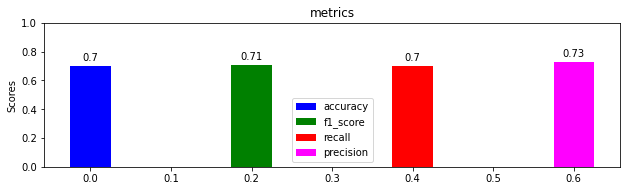

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric_arav[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric_arav[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric_arav[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric_arav[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')


autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Comparing the three results

In [ ]:
Data = [('Fasttext',) + metric_ft  ,
        ('AraVec',)+ metric_arav ,
         ('Fasttext + AraVec',)+ metric ]

In [ ]:
Results = pd.DataFrame(data =  Data , columns=['Embedding','Accuracy','F1_score','Recall','Precision'])

In [ ]:
Results

,Embedding,Accuracy,F1_score,Recall,Precision
0,Fasttext,0.705882,0.719702,0.705882,0.734563
1,AraVec,0.695046,0.709296,0.695046,0.725988
2,Fasttext + AraVec,0.722910,0.728372,0.722910,0.735046
